In [170]:
import sys
sys.path.append("../..")
import itertools

import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt

from src.data.preprocess_data import preprocess
from src.utils.utils import get_gene_list_real_data, nanmean,get_test_statistics

sc.settings.verbosity = 1

Global variables 

In [171]:
nr_ctrl_genes = 200
nr_sig_genes = 20

Use synthetic data

In [172]:
#adatas = {'G1_5_G2_95': sc.read_h5ad("../data/synthetic_data/G1_5_G2_95/dataset.hdf5"),
#          'G1_95_G2_5': sc.read_h5ad("../data/synthetic_data/G1_95_G2_5/dataset.hdf5")}

In [173]:
#for key, adata in adatas.items():
#    preprocess(adata,
#               min_genes=700,
#               min_cells=10,
#               target_sum=1e4,
#               copy=False,
#               verbose=1,
#               log=None)

In [174]:
#ds1_defacG1 = adatas['G1_5_G2_95'].var[adatas['G1_5_G2_95'].var['DEFacGroup1']>1]
#ds2_defacG1 = adatas['G1_95_G2_5'].var[adatas['G1_95_G2_5'].var['DEFacGroup1']>1]

In [175]:
#ds1_defacG1.shape

In [176]:
#de_geneset = list(set(ds1_defacG1.index).intersection(set(ds2_defacG1.index)))

In [177]:
#gene_list_most_de = list(ds1_defacG1.loc[de_geneset].nlargest(nr_sig_genes, columns='DEFacGroup1').index)
#gene_list_random_de = list(ds1_defacG1.loc[de_geneset][ds1_defacG1.loc[de_geneset]['DEFacGroup1'] > 1.1].sample(nr_sig_genes).index)

In [178]:
#gene_list = gene_list_most_de

Using esophageal data 

In [179]:
raw_adata = sc.read_h5ad("../data/real_data/P62T_adata.h5ad")

In [180]:
adata = raw_adata[raw_adata.obs['healthy']!='undecided',:].copy()
del raw_adata


In [181]:
preprocess(adata,min_genes=700,min_cells=10,target_sum=1e4,copy=False)

Look at the UMAP of all the cells

In [182]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

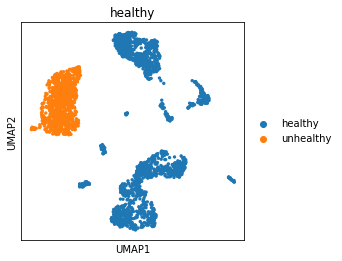

In [183]:
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='healthy')

Get gene signature with DE

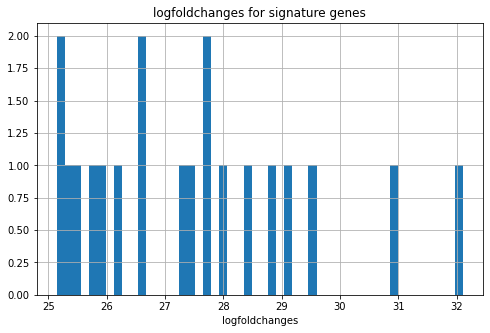

In [184]:
gene_list = gene_list = get_gene_list_real_data(
    adata,
    dge_method="wilcoxon",
    dge_key="wilcoxon",
    dge_pval_cutoff=0.01,
    dge_log2fc_min=0.01,
    nr_de_genes=nr_sig_genes,
    mode="most_diff_expressed",
    log='get_gene_list',
    copy=False,
    verbose=1
)

Get ranked means, take neighbors

In [185]:
obs_avg = pd.Series(nanmean(adata.X, axis=0), index=adata.var_names)
obs_avg = obs_avg[np.isfinite(obs_avg)]

In [186]:
vals_means = obs_avg.sort_values().values

In [187]:
idex_de = np.where(obs_avg.sort_values().index.isin(gene_list))

In [188]:
#list(idex_de[0])

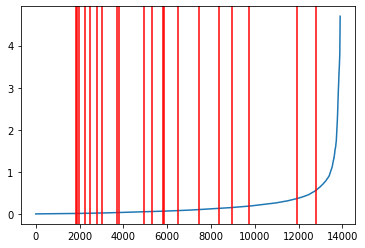

In [189]:
plt.plot(obs_avg.sort_values().values)
for sig_gene in list(idex_de[0]):
    plt.axvline(sig_gene, c='r')

In [190]:
# correct computations of cuts
sorted_obs_avg = obs_avg.sort_values()
ranked_obs_avg = sorted_obs_avg.rank(method="min")

In [191]:
ranked_ref_genes = ranked_obs_avg[ranked_obs_avg.index.isin(gene_list)==False]

In [192]:
ctrl_genes_half = int(np.round(nr_ctrl_genes/2))

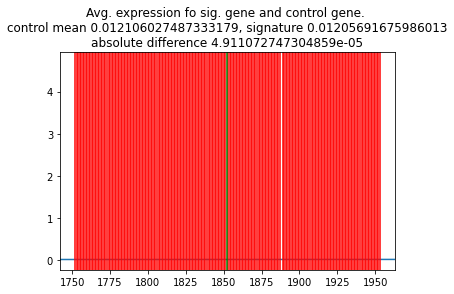

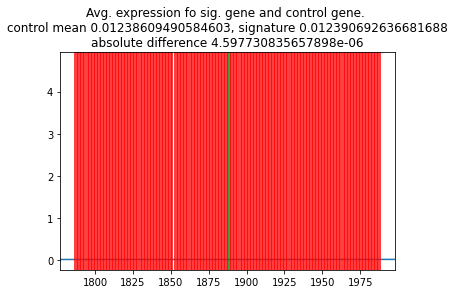

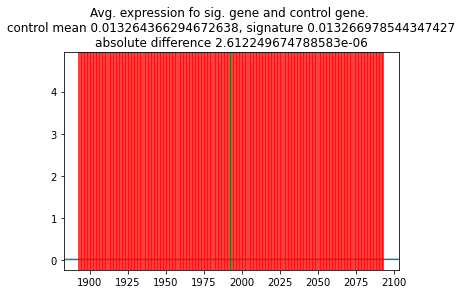

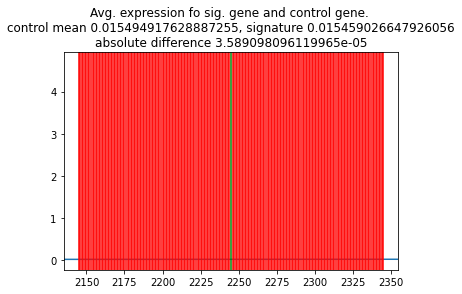

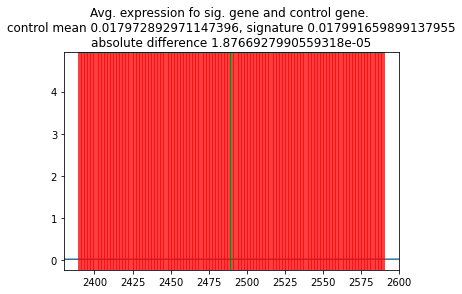

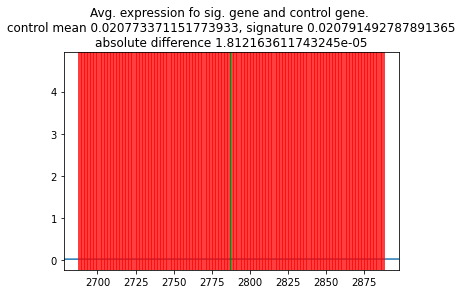

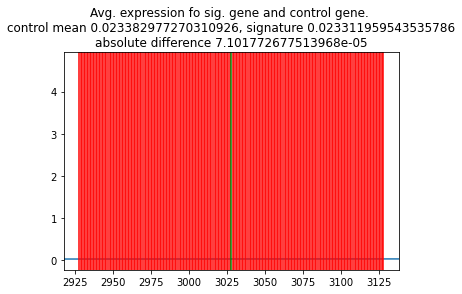

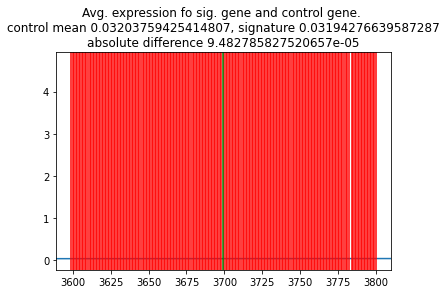

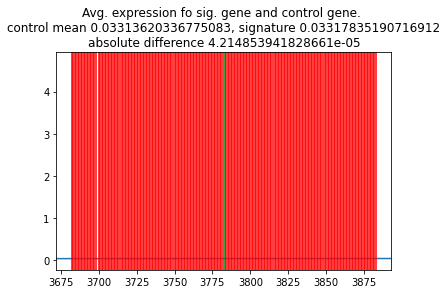

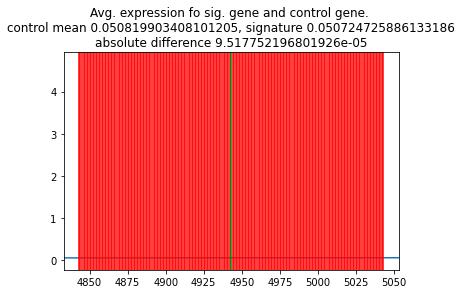

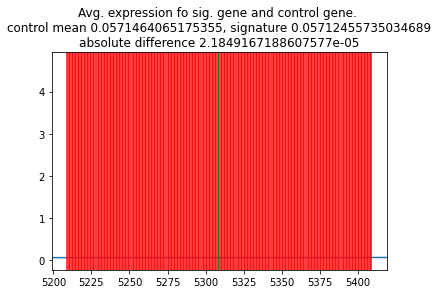

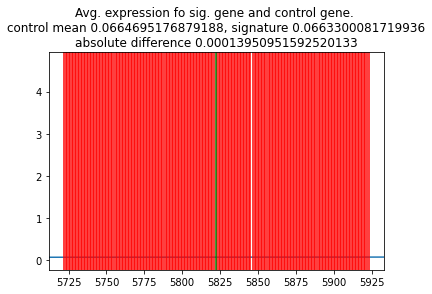

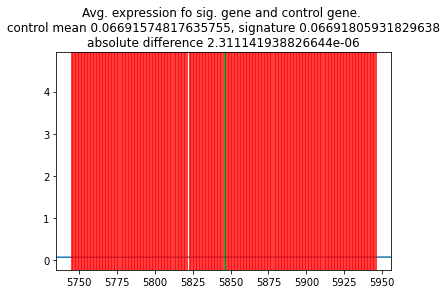

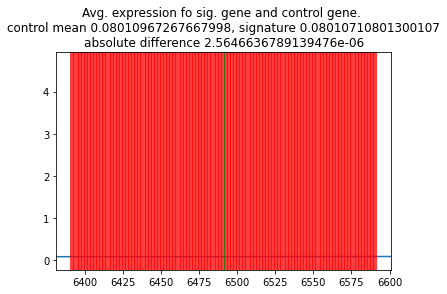

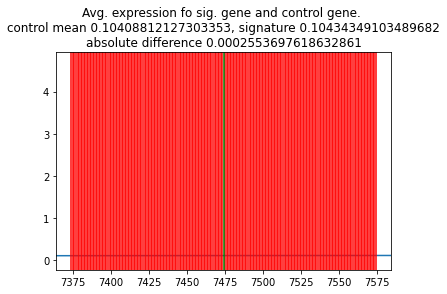

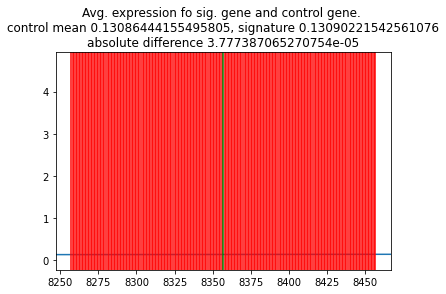

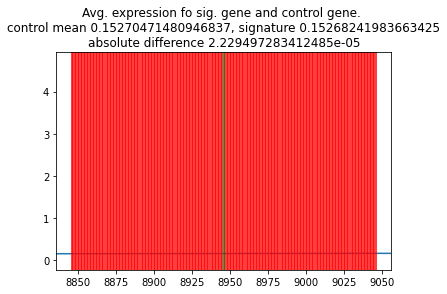

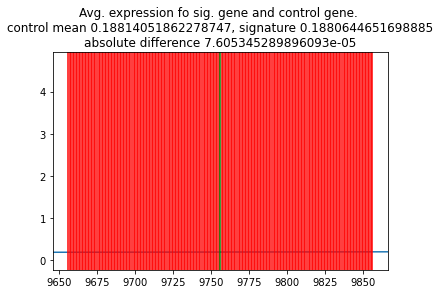

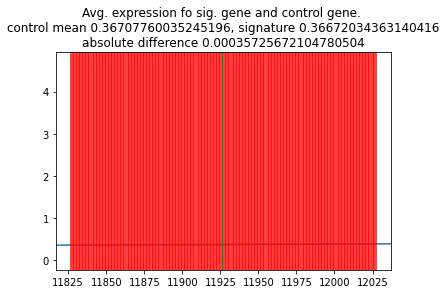

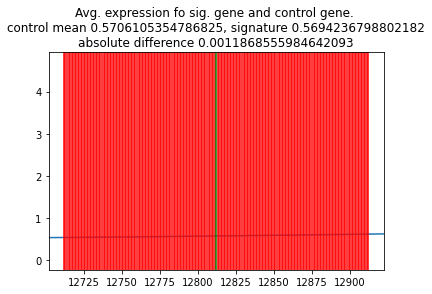

In [193]:
ctrl_genes_list = []
for index, val in ranked_obs_avg.loc[gene_list].sort_values().items():
    idx_where_insert = ranked_ref_genes.searchsorted(val)
    lower = idx_where_insert-ctrl_genes_half
    upper = idx_where_insert+ctrl_genes_half
    if lower <0:
        lower = 0
    if upper > ranked_ref_genes.shape[0]:
        upper = ranked_ref_genes.shape[0]
    ctrl_genes =  ranked_ref_genes.iloc[lower: upper]
    ctrl_genes_list.append(ctrl_genes.index.tolist())

    idx_ctrl_genes = np.where(sorted_obs_avg.index.isin(ctrl_genes.index))
    idx_sig = np.where(sorted_obs_avg.index.isin([index]))
    plt.plot(sorted_obs_avg.values)
    for ctrl_gene in list(idx_ctrl_genes[0]):
        plt.axvline(ctrl_gene, c='r')
    plt.axvline(idx_sig[0], c='g')
    plt.xlim([idx_ctrl_genes[0].min()-10, idx_ctrl_genes[0].max()+10])
    mean_avg_ctrl = sorted_obs_avg.loc[ctrl_genes.index].mean()
    avg_sig = sorted_obs_avg.loc[index]
    plt.title(f'Avg. expression fo sig. gene and control gene. \n'
              f'control mean {mean_avg_ctrl}, signature {avg_sig}\n'
              f'absolute difference {np.abs(mean_avg_ctrl-avg_sig)}')
    plt.show()



In [194]:
ctrl_genes_list

[['RP11-875O11.1',
  'NUDT17',
  'KLHDC9',
  'RP1-223E5.4',
  'KIF15',
  'RP11-783K16.5',
  'C17orf51',
  'PAK6',
  'CTD-2342J14.6',
  'RP11-138I1.4',
  'ZNF587B',
  'SSC5D',
  'FBXL14',
  'RP11-649A18.12',
  'ST20-AS1',
  'USP51',
  'WDR62',
  'C5orf34',
  'ZBTB8A',
  'LINC01410',
  'RP11-91G21.1',
  'RP11-160O5.1',
  'LINC01011',
  'PDE4C',
  'C19orf44',
  'NAT14',
  'HOXC4',
  'LSMEM1',
  'NCKAP5',
  'DKFZP434I0714',
  'MZF1-AS1',
  'HLX',
  'CATSPER1',
  'ARVCF',
  'ATP2A1-AS1',
  'RP5-832C2.5',
  'RP11-539L10.3',
  'C3orf62',
  'SCARF1',
  'ARRDC3-AS1',
  'SH3D21',
  'ZFP69',
  'SLC4A11',
  'ZSWIM1',
  'CTD-2017D11.1',
  'RAVER2',
  'NIPAL4',
  'CTD-3214H19.6',
  'JAKMIP2',
  'TVP23A',
  'SERPINB9P1',
  'RP11-196G18.23',
  'MMP25',
  'SDK2',
  'ZNF852',
  'FAM71E1',
  'ORC1',
  'CTD-2366F13.1',
  'CATSPERG',
  'SLC47A1',
  'NUDT10',
  'BBOF1',
  'ARF4-AS1',
  'EMILIN1',
  'DLGAP3',
  'PKN3',
  'TTLL7',
  'PSMD6-AS2',
  'TGM1',
  'CAPN3',
  'XKR9',
  'ZNF382',
  'FLJ21408',
  'CDHR

In [195]:
ref_genes_obs_avg = sorted_obs_avg[sorted_obs_avg.index.isin(gene_list)==False]

In [196]:
rolled = ref_genes_obs_avg.rolling(nr_ctrl_genes, closed='right').mean()

In [210]:
sorted_obs_avg.sort_index().iloc[5900:5920]

KRT16       0.407088
KRT17       0.615984
KRT18       0.614987
KRT19       1.258056
KRT23       0.009207
KRT5        1.182521
KRT6A       1.011693
KRT6B       0.080107
KRT7        0.035261
KRT8        0.502457
KRT80       0.012057
KRT81       0.076541
KRT86       0.121628
KRTCAP2     0.946413
KRTCAP3     0.172401
KSR1        0.025940
KTI12       0.078835
KTN1        0.736570
KTN1-AS1    0.015542
KXD1        0.398992
dtype: float64

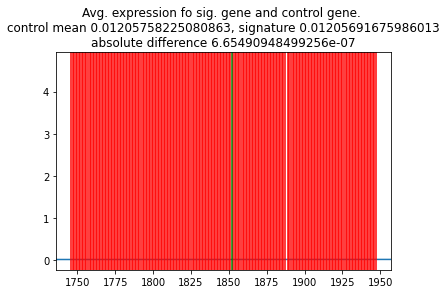

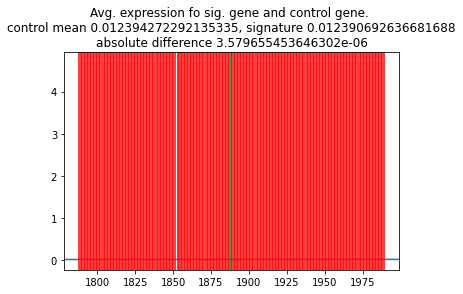

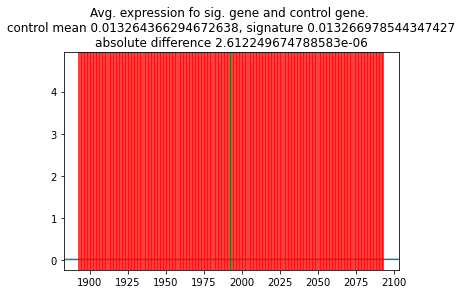

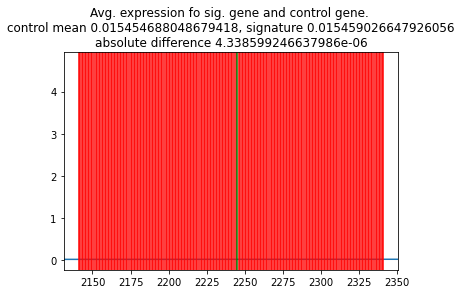

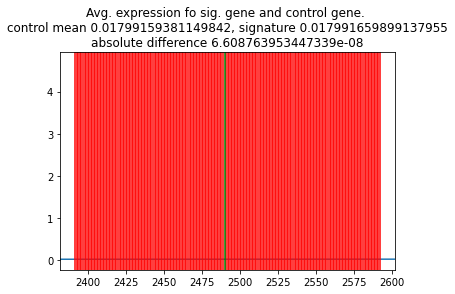

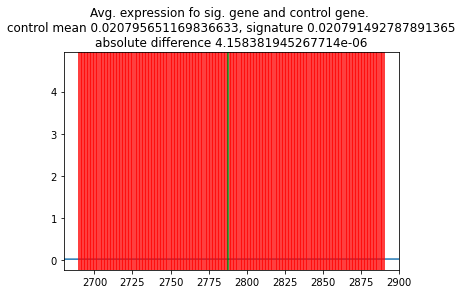

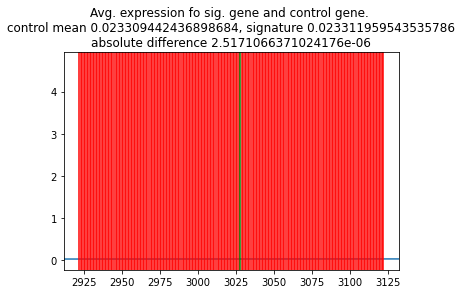

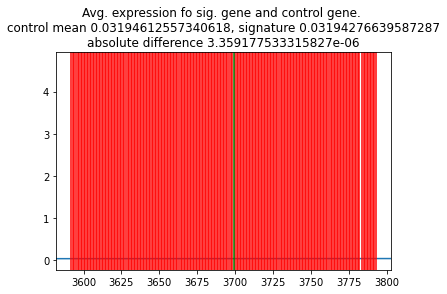

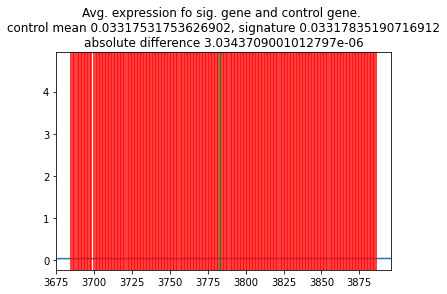

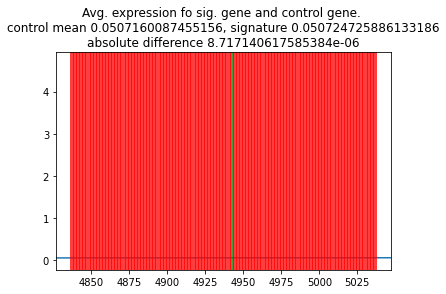

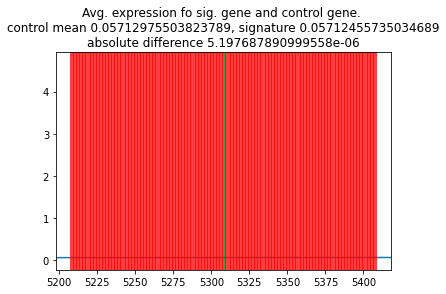

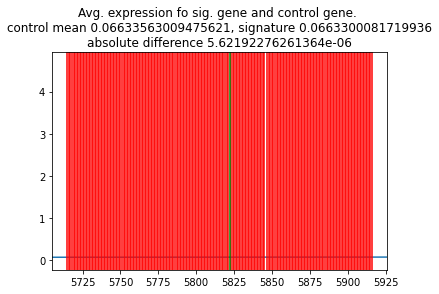

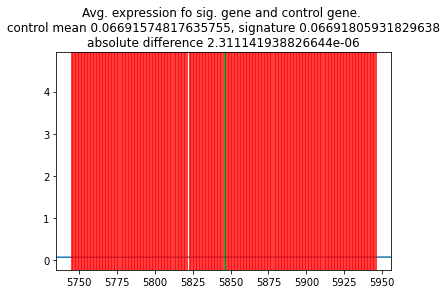

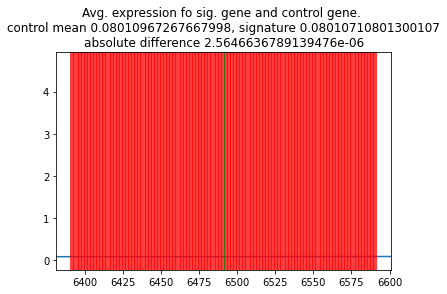

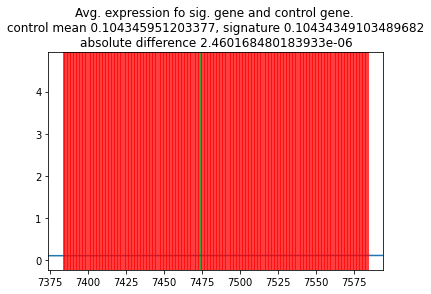

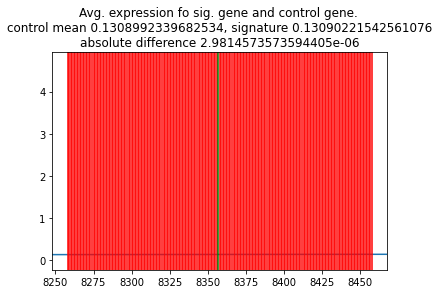

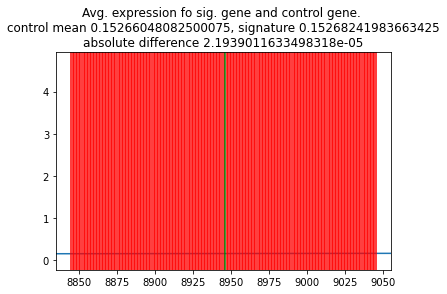

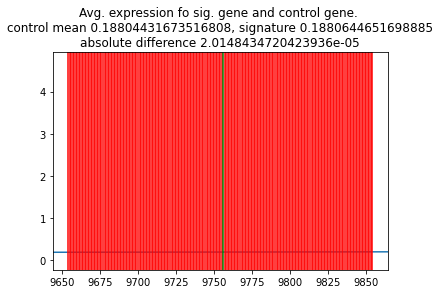

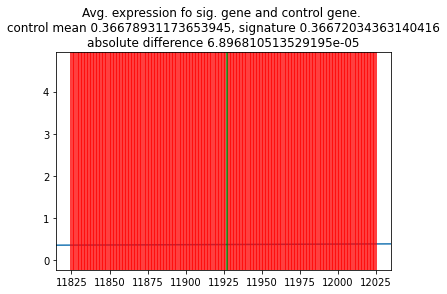

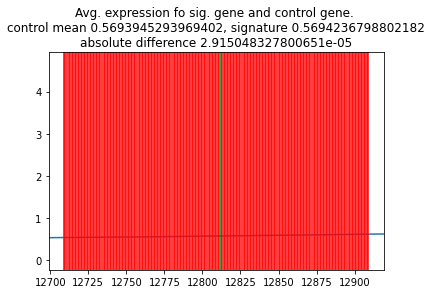

In [216]:
adj_ctrl_genes_list = []
for index, val in ranked_obs_avg.loc[gene_list].sort_values().items():
    curr_sig_avg = sorted_obs_avg.loc[index]
    min_val_idx = np.argmin(((rolled - curr_sig_avg).abs()))
    sig_gene_ctrl_genes = rolled.iloc[(min_val_idx-nr_ctrl_genes+1):min_val_idx+1]
    adj_ctrl_genes_list.append(list(sig_gene_ctrl_genes.index))
    
    idx_ctrl_genes = np.where(sorted_obs_avg.index.isin(sig_gene_ctrl_genes.index))
    idx_sig = np.where(sorted_obs_avg.index.isin([index]))
    plt.plot(sorted_obs_avg.values)
    for ctrl_gene in list(idx_ctrl_genes[0]):
        plt.axvline(ctrl_gene, c='r')
    plt.axvline(idx_sig[0], c='g')
    plt.xlim([idx_ctrl_genes[0].min()-10, idx_ctrl_genes[0].max()+10])
    mean_avg_ctrl = sorted_obs_avg.loc[sig_gene_ctrl_genes.index].mean()
    avg_sig = sorted_obs_avg.loc[index]
    plt.title(f'Avg. expression fo sig. gene and control gene. \n'
              f'control mean {mean_avg_ctrl}, signature {avg_sig}\n'
              f'absolute difference {np.abs(mean_avg_ctrl-avg_sig)}')
    plt.show()

In [217]:
adj_ctrl_genes_list = list(itertools.chain(*adj_ctrl_genes_list))

In [219]:
X_list = adata[:, gene_list].X
X_list = nanmean(X_list, axis=1, dtype="float64")

X_control = adata[:, adj_ctrl_genes_list].X
X_control = nanmean(X_control, axis=1, dtype="float64")

score = X_list - X_control

In [220]:
score

array([-0.1571499 , -0.08717496, -0.15651744, ..., -0.07251208,
       -0.11456528, -0.10605543])

In [221]:
adata.obs["adjusted_neighborhood"] = pd.Series(
        np.array(score).ravel(), index=adata.obs_names, dtype="float64"
    )

In [24]:
from src.scoring_methods.tirosh_signature_scoring import score_genes as tirosh_scoring
from src.scoring_methods.neighborhood_signature_scoring import score_genes as neighborhood_scoring

In [25]:
tirosh_scoring(
        adata,
        gene_list,
        n_bins=25,
        ctrl_size=100,
        verbose=0,
        score_name="Tirosh scoring",
        random_state=5,
    )

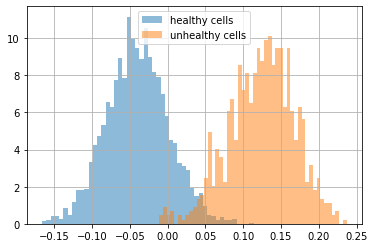

In [26]:
adata.obs["no_binning"][adata.obs["healthy"]=='healthy'].hist(bins=50, density=True, label="healthy cells", alpha=0.5)
adata.obs["no_binning"][adata.obs["healthy"]=='unhealthy'].hist(bins=50,density=True, label="unhealthy cells", alpha=0.5)
plt.legend()

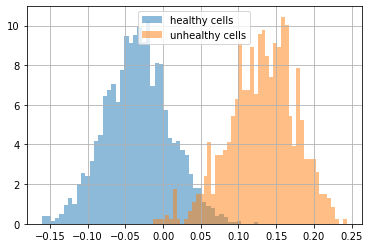

In [27]:
adata.obs["Tirosh scoring"][adata.obs["healthy"]=='healthy'].hist(bins=50, density=True, label="healthy cells", alpha=0.5)
adata.obs["Tirosh scoring"][adata.obs["healthy"]=='unhealthy'].hist(bins=50,density=True, label="unhealthy cells", alpha=0.5)
plt.legend()

In [28]:
neighborhood_scoring(
        adata,
        gene_list,
        ctrl_size=100,
        verbose=0,
        score_name="no_binning_2",
        random_state=1000,
    )

In [29]:
adata.obs[["no_binning","no_binning_2"]]

,no_binning,no_binning_2
index,,
P23T-I-AAACGGGAGGCCATAG-0,-0.019493,-0.019493
P23T-I-AAAGATGAGCACACAG-0,-0.034991,-0.034990
P23T-I-AAAGCAACAGCGTTCG-0,-0.023558,-0.023557
P23T-I-AAAGCAATCAGTGCAT-0,-0.005874,-0.005874
P23T-I-AAAGTAGTCGTCTGAA-0,-0.051732,-0.051732
...,...,...
P23T-E-TTGGAACAGAATGTGT-7,-0.007081,-0.007081
P23T-E-TTGGAACAGTGTCCAT-7,0.013008,0.013009
P23T-E-TTGTAGGAGTCCATAC-7,-0.009924,-0.009925


In [30]:
test_stat = get_test_statistics(adata,
                                ['Tirosh scoring', 'no_binning', 'no_binning_2'],
                                test_method="auc",
                                label_col='healthy',
                                label_whsc='unhealthy',
                                save=False,
                                store_data_path=None)
test_stat = get_test_statistics(adata,
                                ['Tirosh scoring', 'no_binning', 'no_binning_2'],
                                test_method="kstest",
                                label_col='healthy',
                                label_whsc='unhealthy',
                                old_df = test_stat,
                                save=False,
                                store_data_path=None)
test_stat = get_test_statistics(adata,
                                ['Tirosh scoring', 'no_binning', 'no_binning_2'],
                                test_method='mannwhitneyu',
                                label_col='healthy',
                                label_whsc='unhealthy',
                                old_df = test_stat,
                                save=False,
                                store_data_path=None)
test_stat

,Scoring method,Test method,Statistic,pvalue
0,tirosh_scoring,auc,9.951947e-01,NaN
1,no_binning,auc,9.958651e-01,NaN
2,no_binning_2,auc,9.958651e-01,NaN
3,tirosh_scoring,kstest,0.000000e+00,1.0
4,no_binning,kstest,0.000000e+00,1.0
5,no_binning_2,kstest,0.000000e+00,1.0
6,tirosh_scoring,mannwhitneyu,2.304032e+06,0.0
7,no_binning,mannwhitneyu,2.305584e+06,0.0
8,no_binning_2,mannwhitneyu,2.305584e+06,0.0
